<img src="https://studenthub.atu.ie/assets/ATU_Logo.fa93bf0a.svg" alt="ATU Logo" width="300" height="100">

# **Project for 2024 Programming for Data Analytics (PFDA) module.**

## 1. Introduction / About this project
This is the project for the 2024 Programming for Data Analytics (PFDA) module. A description of the project can be found [here](https://github.com/andrewbeattycourseware/PFDA-courseware/blob/main/labs/Project%20Description.pdf). Initially, I was going to do a project on aviation but struggled to find usable datasets that were free of charge. Since we often talk about the weather here in Ireland, I decided to explore it through analytics, touching upon as many suggestions as possible as per the project brief.

## 2. Imported libraries & modules:

### 2.1 [Pandas](https://pandas.pydata.org/) for data frames:
A fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. 
### 2.2 [Matplotlib](https://matplotlib.org/stable/) for plotting:
A comprehensive library for creating static, animated, and interactive visualizations.
### 2.3 [Seaborn](https://seaborn.pydata.org/)
seaborn: statistical data visualization

## 3. Athenry weather station.

In [28]:
# Data frames.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data set.
file_path = r"C:\Users\User\ATU\PFDA\Project\mly1875.csv"
df = pd.read_csv(file_path, on_bad_lines='skip')

df

,Station Name: ATHENRY
0,Station Height: 40 M
1,year: - Year
2,month: - Month
3,rain: - Precipitation Amount (mm)
4,meant: - Mean Air Temperature (C)
5,maxtp: - Maximum Air Temperature (C)\t
6,mintp: - Minimum Air Temperature (C)\t
7,mnmax: - Mean Maximum Temperature (C)
8,mnmin: - Mean Minimum Temperature (C)
9,gmin: - Grass Minimum Temperature (C)


In [31]:
df = pd.read_csv(file_path, skiprows=19)

df

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,2010,3,5.5,13.9,-5.7,9.9,1.1,73.3,-6.4,6.8,45,
1,2010,4,8.8,18.5,-1.8,13.8,3.9,76.8,-2.3,6.3,40,
2,2010,5,10.4,24.5,0.2,15.6,5.2,38.4,-0.3,6.1,28,
3,2010,6,14.7,22.1,4.3,19.5,9.9,28.3,3.6,6.6,28,
4,2010,7,15.1,20.0,6.9,18.2,12.0,155.5,7.3,7.7,37,
...,...,...,...,...,...,...,...,...,...,...,...,...
172,2024,7,14.6,22.2,6.3,19.0,10.3,71.5,3.6,5.9,26,
173,2024,8,14.7,21.7,5.8,18.4,11.0,159.0,2.4,7.6,33,
174,2024,9,12.9,24.0,2.1,17.0,8.7,46.6,-0.2,6.5,33,
175,2024,10,11.0,19.1,-0.5,14.8,7.1,112.7,-2.8,6.7,51,


In [35]:
type(df)

pandas.core.frame.DataFrame

The data frames starts in March 2010 so I decided to remove those rows as well 2024 to only have complete years to work with:

In [ ]:
df = df[~df['year'].isin([2011, 2024])]
df

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,2010,3,5.5,13.9,-5.7,9.9,1.1,73.3,-6.4,6.8,45,
1,2010,4,8.8,18.5,-1.8,13.8,3.9,76.8,-2.3,6.3,40,
2,2010,5,10.4,24.5,0.2,15.6,5.2,38.4,-0.3,6.1,28,
3,2010,6,14.7,22.1,4.3,19.5,9.9,28.3,3.6,6.6,28,
4,2010,7,15.1,20.0,6.9,18.2,12.0,155.5,7.3,7.7,37,
...,...,...,...,...,...,...,...,...,...,...,...,...
161,2023,8,15.4,24.9,6.6,19.1,11.7,129.1,4.7,6.8,33,
162,2023,9,14.6,27.7,3.8,19.1,10.2,148.2,1.7,6.1,36,
163,2023,10,11.0,20.7,-0.3,14.7,7.4,179.9,-3.1,6.2,32,
164,2023,11,7.6,13.7,-3.8,10.8,4.5,113.5,-4.1,6.8,62,


In [36]:
print(df.dtypes)

year       int64
month      int64
meant    float64
maxtp    float64
mintp    float64
mnmax    float64
mnmin    float64
rain      object
gmin      object
wdsp     float64
maxgt      int64
sun       object
dtype: object


In [33]:
# Group by year and calculate average rainfall.
avg_rainfall_per_year = df.groupby('year')['rain'].mean().reset_index()

# Plot the bar chart for all years.
plt.figure(figsize=(10, 6))  # Set the figure size.
plt.bar(avg_rainfall_per_year['year'], avg_rainfall_per_year['rain'], color='skyblue')

# Title and labels.
plt.title('Average Rainfall per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rainfall (mm)', fontsize=12)
plt.xticks(avg_rainfall_per_year['year'], rotation=45)  # Rotate x-axis labels for better readability.

# Plot.
plt.tight_layout()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# Load the CSV file from the URL.
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# Skipping initial rows to directly access data & adding 'low_memory=False' afer it was suggested by output.
df = pd.read_csv(url, skiprows=23, low_memory=False)
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248389,30-nov-2024 20:00,0,0.0,0,11.6,0,10.9,10.3,12.5,91,...,2,17,2,200,,,0.0,,0,8
248390,30-nov-2024 21:00,0,0.0,0,11.4,0,10.7,10.0,12.3,91,...,2,16,2,200,,,0.0,,0,8
248391,30-nov-2024 22:00,0,0.0,0,10.9,0,10.3,9.7,12.0,92,...,2,15,2,210,,,0.0,,0,8
248392,30-nov-2024 23:00,0,0.0,0,10.8,0,10.3,9.9,12.1,94,...,2,14,2,190,,,0.0,,0,8


C:\Users\User\AppData\Local\Temp\ipykernel_19172\1420330102.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


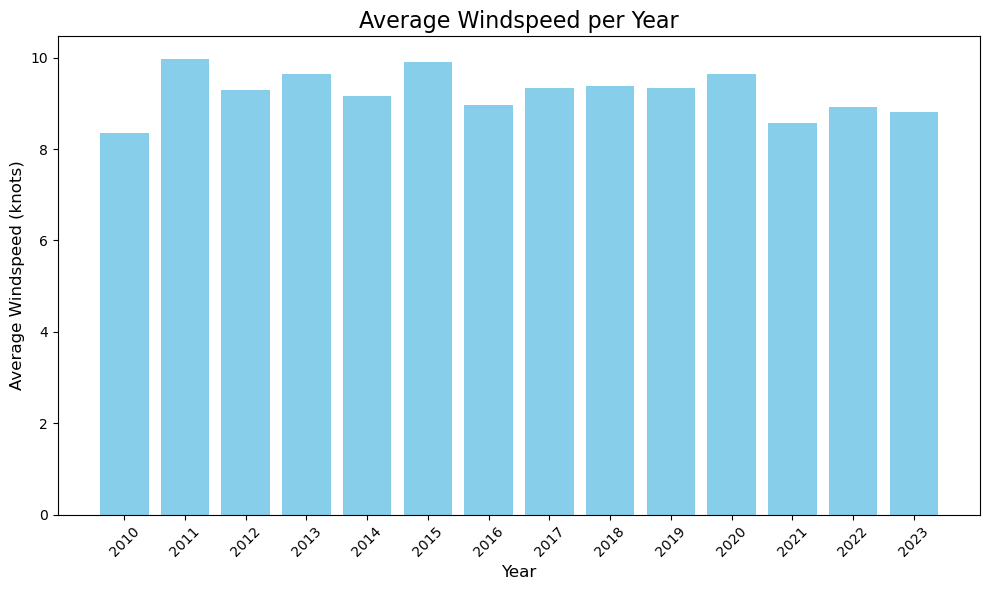

In [ ]:
# Convert 'date' column to datetime format.
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert 'wdsp' column to numeric format.
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

# Extract year and day of the week from 'date'.
df['year'] = df['date'].dt.year
df['weekday'] = df['date'].dt.day_name()

# Exclude years 1996 - 2009 and 2024.
df = df[~df['year'].isin(range(1996, 2010)) & ~df['year'].isin([2024])]

# Group by year and calculate average windspeed.
avg_windspeed_per_year = df.groupby('year')['wdsp'].mean().reset_index()

# Plot the bar chart for all years.
plt.figure(figsize=(10, 6))  # Set the figure size.
plt.bar(avg_windspeed_per_year['year'], avg_windspeed_per_year['wdsp'], color='skyblue')

# Title and labels.
plt.title('Average Windspeed per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Windspeed (knots)', fontsize=12)
plt.xticks(avg_windspeed_per_year['year'], rotation=45)  # Rotate x-axis labels for better readability.

# Plot.
plt.tight_layout()
plt.show()

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html